# GitHub API REST v3 -> コントリビュートのばらつき
ここではコントリビュート（貢献度）のばらつきを確認します。

## リポジトリの確認と指定方法
例えば以下の条件で調べると, microsoft/vscodeと出てきます。
- microsoft -> owner
- vscode -> repo

https://github.com/search?q=vscode 

In [1]:
# input values
owner = "microsoft"
repo = "vscode"

print("[owner]{0} [repo]{1}について出力します。".format(owner, repo))

[owner]microsoft [repo]vscodeについて出力します。


## ライブラリのインポート

In [2]:
# Libraries
import requests
import json
import pprint
import pandas as pd
import math
import numpy as np

## original Libraries
import config_manager as cnf
import github_api.github_api_manager as gapi

## ユーザー情報の取得
- ユーザー名とパスワードを取得します。
- ユーザー情報は、config\setting.cnfに設定します。

In [3]:
# load config file
cnf_data = cnf.confg_manager()
cnf_data.load()
username, userpassword = cnf_data.get_userparam()

# create github api object
gapi_ctrl = gapi.github_api_manager(username, userpassword)

## GitHub APIを叩いてContributorsの情報を取得します
ページで分けて取らないといけないようなので、
データの取得数が0になるまで取り続けます。

In [4]:

# create repository api
github_api = "/repos/{owner}/{repo}/contributors?page={0}&per_page={1}" \
    .replace("{owner}", owner).replace("{repo}", repo)

page = 0
per_page = 30
ret_json = gapi_ctrl.get_json(github_api.format(page, per_page))

# create Empty dataframe
df = pd.DataFrame(index=[], columns=ret_json[0].keys())

while len(ret_json) > 0:
    # apend data
    for k in ret_json:
        df = df.append(pd.DataFrame.from_dict(k, orient='index').T)

    page = page + 1
    ret_json = gapi_ctrl.get_json(github_api.format(page, per_page))

GET https://api.github.com/repos/microsoft/vscode/contributors?page=0&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=1&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=2&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=3&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=4&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=5&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=6&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=7&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=8&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=9&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=10&per_page=30
GET https://api.github.com/repos/microsoft/vscode/contributors?page=11&per_page=30
GET https://ap

## 値のキャストを行います
- ざっくり情報を見ておきます

In [5]:
# cast int
df['contributions'] = df['contributions'].astype(float)

# information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 0
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   login                401 non-null    object 
 1   id                   401 non-null    object 
 2   node_id              401 non-null    object 
 3   avatar_url           401 non-null    object 
 4   gravatar_id          401 non-null    object 
 5   url                  401 non-null    object 
 6   html_url             401 non-null    object 
 7   followers_url        401 non-null    object 
 8   following_url        401 non-null    object 
 9   gists_url            401 non-null    object 
 10  starred_url          401 non-null    object 
 11  subscriptions_url    401 non-null    object 
 12  organizations_url    401 non-null    object 
 13  repos_url            401 non-null    object 
 14  events_url           401 non-null    object 
 15  received_events_url  401 non-null    objec

# Contributorsをヒストグラムで表示します
偏りすぎていてよくわかりません。

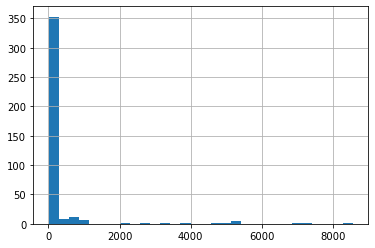

In [6]:
# show histogram bins=30
df.contributions.hist(bins=30)

# 対数変換をかけてヒストグラム表示します
ばらつきが見やすくなりました。

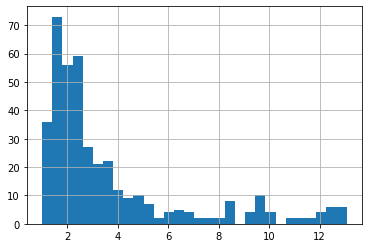

In [7]:
# show histogram for log2 bins=30
np.log2(df.contributions).hist(bins=30)